# Credit Card Fraud Detection
by Giovaldi R

# Work Flow
Credit Card Data -> Data Preprocessing -> EDA -> TrainTestSplit -> Modeling -> Evaluation

# Context

**Eng:**
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

**Bahasa:**
Penting bagi perusahaan kartu kredit untuk dapat mengenali transaksi kartu kredit yang curang agar pelanggan tidak dikenakan biaya atas barang yang tidak mereka beli.


# Content
source: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

**Eng:**

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

**Bahasa:**

Dataset ini berisi transaksi yang dilakukan dengan kartu kredit oleh pemegang kartu Eropa pada bulan September 2013.
Dataset ini mencakup transaksi yang terjadi dalam dua hari, di mana terdapat 492 kasus penipuan dari total 284.807 transaksi. Dataset ini sangat tidak seimbang, di mana kelas positif (penipuan) hanya menyumbang 0,172% dari total transaksi.

Dataset ini hanya berisi variabel input numerik yang merupakan hasil dari transformasi PCA. Sayangnya, karena masalah kerahasiaan, kami tidak dapat memberikan fitur asli dan informasi latar belakang lebih lanjut tentang data ini. Fitur-fitur V1, V2, ..., V28 adalah komponen utama yang diperoleh dengan PCA, satu-satunya fitur yang tidak mengalami transformasi PCA adalah 'Time' dan 'Amount'. Fitur 'Time' berisi waktu dalam detik antara setiap transaksi dengan transaksi pertama dalam dataset. Fitur 'Amount' adalah jumlah transaksi. Fitur ini dapat digunakan untuk pembelajaran yang sensitif terhadap biaya yang bergantung pada contoh. Fitur 'Class' adalah variabel respons yang bernilai 1 jika terjadi penipuan dan 0 jika tidak.

Dengan pertimbangan ketidakseimbangan kelas, kami merekomendasikan untuk mengukur akurasi menggunakan Area di Bawah Kurva Presisi-Pemanggilan (AUPRC). Akurasi matriks kebingungan tidak memiliki makna dalam klasifikasi yang tidak seimbang.


# Import Libraries

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve, auc
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, NearMiss, ClusterCentroids, CondensedNearestNeighbour
import warnings
warnings.filterwarnings("ignore")
warnings.resetwarnings()

file_path = '/content/drive/MyDrive/CreditCardFraudDetection/creditcard.csv'

# Load Data

In [2]:
# Read dataset
df = pd.read_csv(file_path)
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Checking Missing Values, Duplicated Values & Imbalance Values

In [3]:
df.info() # print columns, non-null, and dtype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
# Check for duplicated values
duplicated_rows = df.duplicated()
print("Number of duplicated rows:", duplicated_rows.sum())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Number of duplicated rows: 1081


In [5]:
# Remove duplicated values
df_no_duplicates = df.drop_duplicates()
# Check the shape of the DataFrame after removing duplicates
print("Shape of DataFrame after removing duplicates:", df_no_duplicates.shape)

Shape of DataFrame after removing duplicates: (283726, 31)


In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
df['Class'].value_counts() #check Label distribution (fraudulent and legit transaction)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0    284315
1       492
Name: Class, dtype: int64

**Eng:**
- No missing values were found in the dataset, and no handling is required.
- The target column 'Class' is identified as imbalanced, as seen from the significant difference in values between class 1 and 0. 0: not fraud, 1: fraudulent transaction.

**Bahasa:**
- untuk nilai kosong pada dataset tidak ditemukan dan tidak perlu dilakukan handling
- kolom target 'Class' teridentifikasi inbalance dilihat dari perbandingan antara kelas 1 dan 0 yang sangat jauh nilainya. 0: not fraud, 1: fraudulent transaction.

# Analysis

In [8]:
# seperating the data for analysis
legit = df[df.Class == 0]
fraud = df[df.Class == 1]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [10]:
legit['Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [11]:
fraud['Amount'].describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [12]:
df.groupby('Class').mean()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


# Splitting

build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

- Fraud -> 492
- Legit -> 284315

In [13]:
print(df['Class'].value_counts())

0    284315
1       492
Name: Class, dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
# Separate the features and the target variable
X = df.drop('Class', axis=1)
y = df['Class']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
X

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [16]:
y

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [17]:
# Generate some random data for demonstration
X, y = make_classification(random_state=42)

In [18]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

# Modeling

## Apply several Undersampling Techniques:
**Eng:**

- Random Undersampling: Randomly select a subset of samples from the majority class to match the number of samples in the minority class. This approach is simple and easy to implement, but it may discard potentially valuable information.

- Tomek Links: Identify pairs of samples from different classes that are nearest neighbors to each other and remove the majority class samples. This technique focuses on removing samples that are close to the decision boundary, aiming to improve the separation between classes.

- NearMiss: Select samples from the majority class based on their distances to the minority class samples. There are different variations of the NearMiss algorithm, such as NearMiss-1, NearMiss-2, and NearMiss-3, each using different heuristics to select the most relevant samples for removal.

- Cluster Centroids: Use clustering algorithms to group samples from the majority class and then select the centroids of each cluster to represent the majority class. This approach aims to retain the overall structure and information of the majority class while reducing its size.

- Condensed Nearest Neighbors (CNN): Iteratively add samples from the minority class that are misclassified by a classifier trained on the majority class samples until a reduced and representative subset is obtained. This technique focuses on identifying and preserving the informative minority class samples.

**Bahasa:**

- Random Undersampling: Secara acak memilih subset sampel dari kelas mayoritas untuk menyamakan jumlah sampel dengan kelas minoritas. Pendekatan ini sederhana dan mudah diimplementasikan, namun dapat menghilangkan informasi yang berharga.

- Tomek Links: Mengidentifikasi pasangan sampel dari kelas yang berbeda yang saling berdekatan sebagai tetangga terdekat dan menghapus sampel dari kelas mayoritas. Teknik ini fokus pada penghapusan sampel yang berdekatan dengan batas keputusan, dengan tujuan meningkatkan pemisahan antar kelas.

- NearMiss: Memilih sampel dari kelas mayoritas berdasarkan jarak mereka ke sampel dari kelas minoritas. Terdapat variasi-algoritma NearMiss, seperti NearMiss-1, NearMiss-2, dan NearMiss-3, masing-masing menggunakan heuristik yang berbeda untuk memilih sampel yang paling relevan untuk dihapus.

- Cluster Centroids: Menggunakan algoritma pengelompokan untuk mengelompokkan sampel dari kelas mayoritas, lalu memilih centroid dari setiap kelompok sebagai representasi dari kelas mayoritas. Pendekatan ini bertujuan untuk mempertahankan struktur dan informasi keseluruhan dari kelas mayoritas sambil mengurangi ukurannya.

- Condensed Nearest Neighbors (CNN): Secara iteratif menambahkan sampel dari kelas minoritas yang salah diklasifikasikan oleh classifier yang dilatih dengan sampel dari kelas mayoritas hingga mendapatkan subset yang lebih kecil dan representatif. Teknik ini fokus pada identifikasi dan mempertahankan sampel informatif dari kelas minoritas.

## Apply several Modeling Algorithms:

**Eng:**
- Logistic Regression:

Characteristics: Logistic Regression is a linear classification algorithm that models the relationship between the input features and the probability of a binary outcome. It assumes a linear decision boundary and uses a logistic function to map the input to the output.
Usage: Logistic Regression is widely used for binary classification problems. It is interpretable, computationally efficient, and works well when the relationship between the input features and the target variable is linear.

- Decision Tree:

Characteristics: Decision Trees are non-linear classification algorithms that create a tree-like model to make decisions based on the input features. They partition the feature space into regions by constructing a sequence of if-else rules based on the feature values.
Usage: Decision Trees are versatile and can handle both binary and multi-class classification problems. They are interpretable and can capture complex relationships in the data. However, they are prone to overfitting and may not generalize well to unseen data.

- Random Forest:

Characteristics: Random Forest is an ensemble learning algorithm that combines multiple decision trees to make predictions. It introduces randomness in the tree-building process by randomly selecting subsets of features and samples.
Usage: Random Forest is effective for both binary and multi-class classification problems. It overcomes the overfitting issue of individual decision trees by averaging the predictions of multiple trees. It provides robustness, good generalization, and handles high-dimensional data well.

- K-Nearest Neighbors (KNN):

Characteristics: KNN is a non-parametric lazy learning algorithm that classifies new instances based on the majority vote of their K nearest neighbors in the feature space. The distance metric (e.g., Euclidean, Manhattan) is used to determine the similarity between instances.
Usage: KNN is simple and easy to understand. It can handle both binary and multi-class classification problems. However, its performance may degrade with high-dimensional data, and it requires the entire training dataset during prediction, making it computationally expensive for large datasets.

- Support Vector Classifier (SVC):

Characteristics: SVC is a linear or non-linear classification algorithm that constructs a hyperplane (or set of hyperplanes) to separate the data points into different classes. It aims to maximize the margin between the classes.
Usage: SVC is effective for both binary and multi-class classification problems. It works well in high-dimensional spaces and can capture complex relationships through the use of different kernel functions. However, it can be sensitive to the choice of hyperparameters and may be computationally expensive for large datasets.
The choice of algorithm depends on various factors such as the nature of the problem, the size and complexity of the dataset, interpretability requirements, computational resources, and desired performance. It is recommended to experiment and compare the performance of different algorithms on your specific dataset to determine the most suitable one.


**Bahasa:**

- Regresi Logistik:

Karakteristik: Regresi Logistik adalah algoritma klasifikasi linear yang memodelkan hubungan antara fitur input dan probabilitas hasil biner. Algoritma ini mengasumsikan batas keputusan linear dan menggunakan fungsi logistik untuk memetakan input ke output.
Penggunaan: Regresi Logistik banyak digunakan untuk masalah klasifikasi biner. Algoritma ini dapat diinterpretasikan, efisien secara komputasi, dan berfungsi baik ketika hubungan antara fitur input dan variabel target adalah linear.

- Decision Tree/Pohon Keputusan:

Karakteristik: Pohon Keputusan adalah algoritma klasifikasi non-linear yang menciptakan model berbentuk pohon untuk mengambil keputusan berdasarkan fitur input. Pohon Keputusan membagi ruang fitur menjadi wilayah-wilayah dengan membangun serangkaian aturan if-else berdasarkan nilai fitur.
Penggunaan: Pohon Keputusan serbaguna dan dapat menangani masalah klasifikasi biner maupun multi-kelas. Algoritma ini dapat diinterpretasikan dan dapat menangkap hubungan yang kompleks dalam data. Namun, Pohon Keputusan rentan terhadap overfitting dan mungkin tidak umum dengan baik pada data yang tidak terlihat sebelumnya.

- Random Forest:

Karakteristik: Random Forest adalah algoritma pembelajaran ensemble yang menggabungkan beberapa pohon keputusan untuk membuat prediksi. Algoritma ini memperkenalkan ketidakteraturan dalam proses pembangunan pohon dengan secara acak memilih subset fitur dan sampel.
Penggunaan: Random Forest efektif untuk masalah klasifikasi biner maupun multi-kelas. Algoritma ini mengatasi masalah overfitting pada pohon keputusan individu dengan mengambil rata-rata prediksi dari beberapa pohon. Random Forest memberikan kestabilan, generalisasi yang baik, dan mampu menangani data berdimensi tinggi dengan baik.

- K-Nearest Neighbors (KNN):

Karakteristik: KNN adalah algoritma pembelajaran non-parametrik yang menentukan kelas dari instansi baru berdasarkan mayoritas suara dari K tetangga terdekatnya dalam ruang fitur. Metric jarak (misalnya, Euclidean, Manhattan) digunakan untuk menentukan kemiripan antara instansi.
Penggunaan: KNN sederhana dan mudah dipahami. Algoritma ini dapat menangani masalah klasifikasi biner maupun multi-kelas. Namun, kinerjanya dapat menurun dengan data berdimensi tinggi, dan algoritma ini memerlukan seluruh dataset pelatihan saat prediksi, sehingga komputasi memakan waktu untuk dataset besar.

- Support Vector Classifier (SVC):

Karakteristik: SVC adalah algoritma klasifikasi linear atau non-linear yang membangun hiperplane (atau sekumpulan hiperplane) untuk memisahkan titik-titik data ke dalam kelas-kelas yang berbeda. Algoritma ini bertujuan untuk memaksimalkan margin antara kelas-kelas.
Penggunaan: SVC efektif untuk masalah klasifikasi biner maupun multi-kelas. Algoritma ini berfungsi baik dalam ruang berdimensi tinggi dan dapat menangkap hubungan yang kompleks melalui penggunaan fungsi kernel yang berbeda. Namun, algoritma ini sensitif terhadap pemilihan hiperparameter dan mungkin memakan waktu komputasi untuk dataset besar.
Pemilihan algoritma bergantung pada berbagai faktor seperti sifat masalah, ukuran dan kompleksitas dataset, kebutuhan interpretasi, sumber daya komputasi, dan kinerja yang diinginkan. Disarankan untuk bereksperimen dan membandingkan kinerja dari berbagai algoritma pada dataset spesifik Anda untuk menentukan yang paling cocok.

In [19]:
# Create a dictionary to store the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Classifier': SVC()
}

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
# Create a dictionary to store the undersampling techniques
undersamplers = {
    'Random Undersampling': RandomUnderSampler(random_state=42),
    'Tomek Links': TomekLinks(),
    'NearMiss': NearMiss(),
    'Cluster Centroids': ClusterCentroids(),
    'Condensed Nearest Neighbour': CondensedNearestNeighbour()
}

In [27]:
results = pd.DataFrame(columns=['ModelName', 'UndersamplingTechnique', 'AccuracyScore', 'AUPRC'])

In [28]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
auprc = auc(recall, precision)

In [29]:
current_results = pd.DataFrame({'ModelName': [model_name],
                                'UndersamplingTechnique': [undersampler_name],
                                'AccuracyScore': [accuracy],
                                'AUPRC': [auprc]})

In [30]:
# Loop through the undersampling techniques
for undersampler_name, undersampler in undersamplers.items():
    print(f"Applying undersampling technique: {undersampler_name}")
    X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)
    
    # Loop through the models
    for model_name, model in models.items():
        print(f"Training and evaluating {model_name} with {undersampler_name}")
        
        # Fit the model on the resampled training data
        model.fit(X_resampled, y_resampled)
        
        # Make predictions on the testing data
        y_pred = model.predict(X_test)
        
        # Calculate the accuracy of the model
        accuracy = accuracy_score(y_test, y_pred)
        
        # Calculate precision, recall, and AUPRC
        precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
        auprc = auc(recall, precision)
        
        # Create a DataFrame with the current results
        current_results = pd.DataFrame({'ModelName': [model_name],
                                        'UndersamplingTechnique': [undersampler_name],
                                        'AccuracyScore': [accuracy],
                                        'AUPRC': [auprc]})
        
        # Concatenate the current results with the overall results
        results = pd.concat([results, current_results], ignore_index=True)

Applying undersampling technique: Random Undersampling
Training and evaluating Logistic Regression with Random Undersampling
Training and evaluating Decision Tree with Random Undersampling
Training and evaluating Random Forest with Random Undersampling
Training and evaluating K-Nearest Neighbors with Random Undersampling
Training and evaluating Support Vector Classifier with Random Undersampling
Applying undersampling technique: Tomek Links
Training and evaluating Logistic Regression with Tomek Links
Training and evaluating Decision Tree with Tomek Links
Training and evaluating Random Forest with Tomek Links
Training and evaluating K-Nearest Neighbors with Tomek Links
Training and evaluating Support Vector Classifier with Tomek Links
Applying undersampling technique: NearMiss
Training and evaluating Logistic Regression with NearMiss
Training and evaluating Decision Tree with NearMiss
Training and evaluating Random Forest with NearMiss
Training and evaluating K-Nearest Neighbors with Ne

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training and evaluating K-Nearest Neighbors with Cluster Centroids
Training and evaluating Support Vector Classifier with Cluster Centroids
Applying undersampling technique: Condensed Nearest Neighbour
Training and evaluating Logistic Regression with Condensed Nearest Neighbour
Training and evaluating Decision Tree with Condensed Nearest Neighbour
Training and evaluating Random Forest with Condensed Nearest Neighbour
Training and evaluating K-Nearest Neighbors with Condensed Nearest Neighbour
Training and evaluating Support Vector Classifier with Condensed Nearest Neighbour


In [31]:
results

,ModelName,UndersamplingTechnique,AccuracyScore,AUPRC
0,Logistic Regression,Random Undersampling,0.95,0.954545
1,Decision Tree,Random Undersampling,0.90,0.925000
2,Random Forest,Random Undersampling,0.90,0.925000
3,K-Nearest Neighbors,Random Undersampling,0.95,0.954545
4,Support Vector Classifier,Random Undersampling,0.95,0.954545
5,Logistic Regression,Tomek Links,0.95,0.954545
6,Decision Tree,Tomek Links,0.85,0.884091
7,Random Forest,Tomek Links,0.90,0.925000
8,K-Nearest Neighbors,Tomek Links,0.95,0.954545
9,Support Vector Classifier,Tomek Links,0.95,0.954545


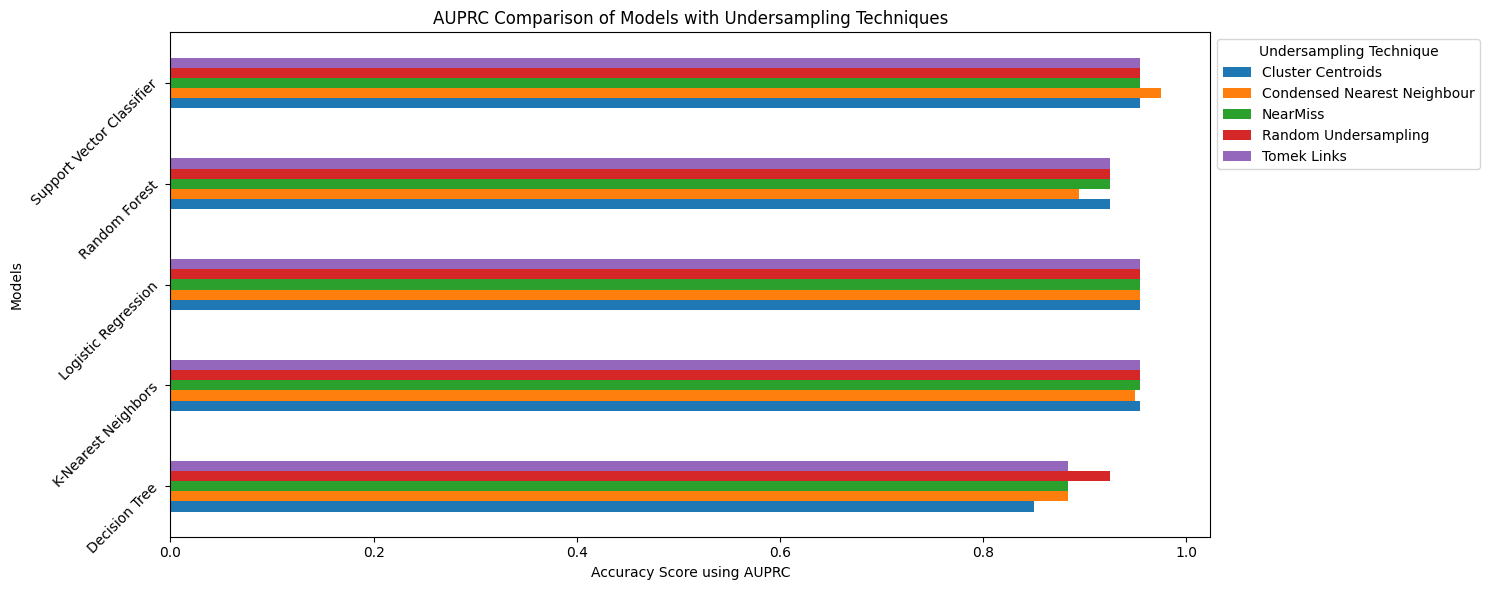

In [33]:
# Create a horizontal bar plot to compare accuracy scores
plt.figure(figsize=(15, 6))
ax = plt.gca()
results.pivot(index='ModelName', columns='UndersamplingTechnique', values='AUPRC').plot(kind='barh', ax=ax)
plt.title('AUPRC Comparison of Models with Undersampling Techniques')
plt.xlabel('Accuracy Score using AUPRC')
plt.ylabel('Models')
plt.legend(title='Undersampling Technique', bbox_to_anchor=(1, 1))

# Rotate the y-axis labels to 45 degrees
plt.yticks(rotation=45)

plt.tight_layout()
plt.show()


# Conclusion

- Best Model: SVC, 
- Undersampling Technique: Condensed Nearest Neighbour
- AUPRC: 0.975000


Conclusion: In this combination, the SVC model with the implementation of Condensed Nearest Neighbour undersampling technique achieves an AUPRC of 0.975000. This indicates that the model is effective in identifying the positive class (Fraud) while considering the trade-off between precision and recall.

# Acknowledgements

The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection.
More details on current and past projects on related topics are available on https://www.researchgate.net/project/Fraud-detection-5 and the page of the DefeatFraud project

Please cite the following works:

Andrea Dal Pozzolo, Olivier Caelen, Reid A. Johnson and Gianluca Bontempi. Calibrating Probability with Undersampling for Unbalanced Classification. In Symposium on Computational Intelligence and Data Mining (CIDM), IEEE, 2015

Dal Pozzolo, Andrea; Caelen, Olivier; Le Borgne, Yann-Ael; Waterschoot, Serge; Bontempi, Gianluca. Learned lessons in credit card fraud detection from a practitioner perspective, Expert systems with applications,41,10,4915-4928,2014, Pergamon

Dal Pozzolo, Andrea; Boracchi, Giacomo; Caelen, Olivier; Alippi, Cesare; Bontempi, Gianluca. Credit card fraud detection: a realistic modeling and a novel learning strategy, IEEE transactions on neural networks and learning systems,29,8,3784-3797,2018,IEEE

Dal Pozzolo, Andrea Adaptive Machine learning for credit card fraud detection ULB MLG PhD thesis (supervised by G. Bontempi)

Carcillo, Fabrizio; Dal Pozzolo, Andrea; Le Borgne, Yann-Aël; Caelen, Olivier; Mazzer, Yannis; Bontempi, Gianluca. Scarff: a scalable framework for streaming credit card fraud detection with Spark, Information fusion,41, 182-194,2018,Elsevier

Carcillo, Fabrizio; Le Borgne, Yann-Aël; Caelen, Olivier; Bontempi, Gianluca. Streaming active learning strategies for real-life credit card fraud detection: assessment and visualization, International Journal of Data Science and Analytics, 5,4,285-300,2018,Springer International Publishing

Bertrand Lebichot, Yann-Aël Le Borgne, Liyun He, Frederic Oblé, Gianluca Bontempi Deep-Learning Domain Adaptation Techniques for Credit Cards Fraud Detection, INNSBDDL 2019: Recent Advances in Big Data and Deep Learning, pp 78-88, 2019

Fabrizio Carcillo, Yann-Aël Le Borgne, Olivier Caelen, Frederic Oblé, Gianluca Bontempi Combining Unsupervised and Supervised Learning in Credit Card Fraud Detection Information Sciences, 2019

Yann-Aël Le Borgne, Gianluca Bontempi Reproducible machine Learning for Credit Card Fraud Detection - Practical Handbook

Bertrand Lebichot, Gianmarco Paldino, Wissam Siblini, Liyun He, Frederic Oblé, Gianluca Bontempi Incremental learning strategies for credit cards fraud detection, IInternational Journal of Data Science and Analytics

